### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [4]:
data = pd.read_csv('data/coupons.csv')

In [5]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [40]:
data.isnull().sum().sort_values()

destination                 0
direction_same              0
toCoupon_GEQ25min           0
toCoupon_GEQ15min           0
toCoupon_GEQ5min            0
income                      0
direction_opp               0
education                   0
has_children                0
occupation                  0
age                         0
gender                      0
expiration                  0
coupon                      0
time                        0
temperature                 0
weather                     0
passanger                   0
maritalStatus               0
Y                           0
Bar                       107
RestaurantLessThan20      130
CarryAway                 151
Restaurant20To50          189
CoffeeHouse               217
car                     12576
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [8]:
# I have dropped the column car because most of the values in that column are null values
A = data[['destination','direction_same','toCoupon_GEQ25min','toCoupon_GEQ15min','toCoupon_GEQ5min','income','direction_opp',
          'education','has_children','occupation','age','gender','expiration','coupon','time','temperature',
         'weather','passanger','maritalStatus','Y','Bar','RestaurantLessThan20','CarryAway','Restaurant20To50','CoffeeHouse']]

In [9]:
# Dropping null values in other columns
A.dropna(inplace=True)

C:\Users\amrin\AppData\Local\Temp\ipykernel_12756\352957448.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  A.dropna(inplace=True)


In [10]:
A.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12079 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   direction_same        12079 non-null  int64 
 2   toCoupon_GEQ25min     12079 non-null  int64 
 3   toCoupon_GEQ15min     12079 non-null  int64 
 4   toCoupon_GEQ5min      12079 non-null  int64 
 5   income                12079 non-null  object
 6   direction_opp         12079 non-null  int64 
 7   education             12079 non-null  object
 8   has_children          12079 non-null  int64 
 9   occupation            12079 non-null  object
 10  age                   12079 non-null  object
 11  gender                12079 non-null  object
 12  expiration            12079 non-null  object
 13  coupon                12079 non-null  object
 14  time                  12079 non-null  object
 15  temperature           12079 non-nul

4. What proportion of the total observations chose to accept the coupon? 



In [11]:
A['Y'].value_counts()

1    6877
0    5202
Name: Y, dtype: int64

In [122]:
# Since all data values are integers in this dataset, we can use the sum function and count function to determine the percentage
B = round(((A['Y'].sum()/A['Y'].count())),2)
B

0.57

5. Use a bar plot to visualize the `coupon` column.

Text(0.5, 1.0, 'Showcasing the frequency of coupon usage in various restaurant types')

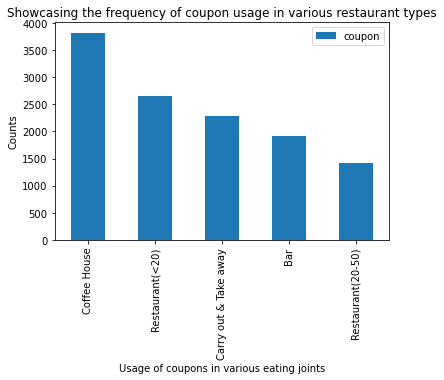

In [13]:
C= pd.DataFrame(A['coupon'].value_counts())
D = C.reset_index()
D.plot(kind='bar', x='index', y ='coupon')
plt.xlabel('Usage of coupons in various eating joints')
plt.ylabel('Counts')
plt.title('Showcasing the frequency of coupon usage in various restaurant types')

6. Use a histogram to visualize the temperature column.

Text(0.5, 1.0, 'Temperature vs Frequency')

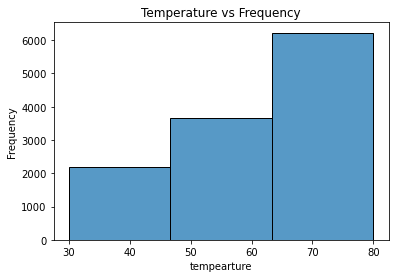

In [14]:
sns.histplot(data=A, x= A['temperature'], bins=3)
plt.xlabel('tempearture')
plt.ylabel('Frequency')
plt.title('Temperature vs Frequency')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [15]:
E = A.query("coupon == 'Bar'")

2. What proportion of bar coupons were accepted?


In [16]:
E['Y'].value_counts()

0    1125
1     788
Name: Y, dtype: int64

In [121]:
F = round(((E['Y'].sum()/E['Y'].count())),2)
F

0.41

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.

In [18]:
#processing the data so that the following occurs, never = 0, less than 1 = 1, 1~3 = 3, 4~8 =8, gt8=9
G= A.query("coupon == 'Bar'")
G['Bar'].mask(G['Bar']=="never",'0',inplace=True)
G['Bar'].mask(G['Bar']=="less1",'1',inplace=True)
G['Bar'].mask(G['Bar']=="1~3",'3',inplace=True)
G['Bar'].mask(G['Bar']=="4~8",'8',inplace=True)
G['Bar'].mask(G['Bar']=="gt8",'9',inplace=True)

C:\Users\amrin\AppData\Local\Temp\ipykernel_12756\2980382977.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  G['Bar'].mask(G['Bar']=="never",'0',inplace=True)
C:\Users\amrin\AppData\Local\Temp\ipykernel_12756\2980382977.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  G['Bar'].mask(G['Bar']=="less1",'1',inplace=True)
C:\Users\amrin\AppData\Local\Temp\ipykernel_12756\2980382977.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

In [20]:
#Changing bar to an integer value

G['Bar']=pd.to_numeric(G['Bar'])

C:\Users\amrin\AppData\Local\Temp\ipykernel_12756\2982159420.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  G['Bar']=pd.to_numeric(G['Bar'])


In [188]:
#Determining the number of people who went to a bar 3 or fewer times a month and accepted the coupon
Less_than_3_accepted = G.loc[G['Bar']<= 3,'Y'].sum()

#Determining the number of people who went to a bar 3 or more times a month and accepted the coupon
Greater_than_3_accepted = G.loc[G['Bar']> 3,'Y'].sum()

#Total number of accepted coupons
Total_accepted1 = G.loc[G['Bar']<= 9,'Y'].sum()

In [189]:
#Comparing the percentage of people who visited the bar 3 times or less vs those who visited more than 3 times as a function
#of total number of coupon acceptances 

Percentage_less_than_3 = round(((Less_than_3_accepted/ Total_accepted1)*100),2)

Percentage_greater_than_3 = round(((Greater_than_3_accepted/Total_accepted1)*100),2)

print("The percent of people who accepted the coupon and visited the bar less than 3 times is",Percentage_less_than_3,"%")

print("The percent of people who accepted the coupon and visited the bar more than 3 times is",Percentage_greater_than_3,"%")


The percent of people who accepted the coupon and visited the bar less than 3 times is 81.35 %
The percent of people who accepted the coupon and visited the bar more than 3 times is 18.65 %


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [31]:
#processing the data so that the following occurs, never = 0, less than 1 = 1, 1~3 = 3, 4~8 =8, gt8=9
H= A.query("coupon == 'Bar'")
H['Bar'].mask(H['Bar']=="never",'0',inplace=True)
H['Bar'].mask(H['Bar']=="less1",'1',inplace=True)
H['Bar'].mask(H['Bar']=="1~3",'3',inplace=True)
H['Bar'].mask(H['Bar']=="4~8",'8',inplace=True)
H['Bar'].mask(H['Bar']=="gt8",'9',inplace=True)

C:\Users\amrin\AppData\Local\Temp\ipykernel_12756\2668844318.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  H['Bar'].mask(H['Bar']=="never",'0',inplace=True)
C:\Users\amrin\AppData\Local\Temp\ipykernel_12756\2668844318.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  H['Bar'].mask(H['Bar']=="less1",'1',inplace=True)
C:\Users\amrin\AppData\Local\Temp\ipykernel_12756\2668844318.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

In [47]:
H['age'].mask(H['age']=="50plus",'51',inplace=True)
H['age'].mask(H['age']=="below21",'20',inplace=True)

C:\Users\amrin\AppData\Local\Temp\ipykernel_12756\469028345.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  H['age'].mask(H['age']=="50plus",'51',inplace=True)
C:\Users\amrin\AppData\Local\Temp\ipykernel_12756\469028345.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  H['age'].mask(H['age']=="below21",'20',inplace=True)


In [56]:
H['age']=pd.to_numeric(H['age'])
H['Bar']=pd.to_numeric(H['Bar'])

C:\Users\amrin\AppData\Local\Temp\ipykernel_12756\155549796.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  H['age']=pd.to_numeric(H['age'])
C:\Users\amrin\AppData\Local\Temp\ipykernel_12756\155549796.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  H['Bar']=pd.to_numeric(H['Bar'])


In [57]:
H.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1913 entries, 24 to 12682
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           1913 non-null   object
 1   direction_same        1913 non-null   int64 
 2   toCoupon_GEQ25min     1913 non-null   int64 
 3   toCoupon_GEQ15min     1913 non-null   int64 
 4   toCoupon_GEQ5min      1913 non-null   int64 
 5   income                1913 non-null   object
 6   direction_opp         1913 non-null   int64 
 7   education             1913 non-null   object
 8   has_children          1913 non-null   int64 
 9   occupation            1913 non-null   object
 10  age                   1913 non-null   int64 
 11  gender                1913 non-null   object
 12  expiration            1913 non-null   object
 13  coupon                1913 non-null   object
 14  time                  1913 non-null   object
 15  temperature           1913 non-null 

In [190]:
#Determining the number of people who went to a bar more than once a month and over the age of 25 who accepted the coupon 

Greater_than_1_over25_accepted = H.loc[(H['Bar']> 1) & (H['age']> 25),'Y'].sum()

#Determining the number of people who went to a bar less than once a month and over the age of 25 who accepted the coupon 

Less_than_1_over25_accepted = H.loc[(H['Bar']<= 1) & (H['age']> 25),'Y'].sum()

#Determining the number of people who went to a bar more than once a month and under the age of 25 who accepted the coupon 

Greater_than_1_less25_accepted = H.loc[(H['Bar']> 1) & (H['age']< 25),'Y'].sum()

#Determining the number of people who went to a bar less than once a month and under the age of 25 who accepted the coupon 

Lesser_than_1_less25_accepted = H.loc[(H['Bar']<= 1) & (H['age']< 25),'Y'].sum()

#Total number of accepted coupons
Total_accepted2 = H.loc[H['Bar']<= 9,'Y'].sum()

# calculating percentages

Percentage_Greater_than_1_over25_accepted = round(((Greater_than_1_over25_accepted/ Total_accepted2)*100),2)
Percentage_Less_than_1_over25_accepted = round(((Less_than_1_over25_accepted /Total_accepted2)*100),2)
Percentage_Greater_than_1_less25_accepted = round(((Greater_than_1_less25_accepted / Total_accepted2)*100),2)
Percentage_Lesser_than_1_less25_accepted = round(((Lesser_than_1_less25_accepted/Total_accepted2)*100),2)

print("The percent of people who accepted the coupon and visited the bar more than 1 times and are over the age of 25 is",Percentage_Greater_than_1_over25_accepted,"%")

print("The percent of people who accepted the coupon and visited the bar less than 1 times and are over the age of 25 is",Percentage_Less_than_1_over25_accepted,"%")

print("The percent of people who accepted the coupon and visited the bar more than 1 times and are under the age of 25 is",Percentage_Greater_than_1_less25_accepted,"%")

print("The percent of people who accepted the coupon and visited the bar less than 1 times and less than the age of 25 is",Percentage_Lesser_than_1_less25_accepted,"%")

The percent of people who accepted the coupon and visited the bar more than 1 times and are over the age of 25 is 35.28 %
The percent of people who accepted the coupon and visited the bar less than 1 times and are over the age of 25 is 35.03 %
The percent of people who accepted the coupon and visited the bar more than 1 times and are under the age of 25 is 14.47 %
The percent of people who accepted the coupon and visited the bar less than 1 times and less than the age of 25 is 15.23 %


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.

In [69]:
I = A.query("coupon == 'Bar'")

In [70]:
#processing the data so that the following occurs, never = 0, less than 1 = 1, 1~3 = 3, 4~8 =8, gt8=9
I['Bar'].mask(I['Bar']=="never",'0',inplace=True)
I['Bar'].mask(I['Bar']=="less1",'1',inplace=True)
I['Bar'].mask(I['Bar']=="1~3",'3',inplace=True)
I['Bar'].mask(I['Bar']=="4~8",'8',inplace=True)
I['Bar'].mask(I['Bar']=="gt8",'9',inplace=True)
I['age'].mask(I['age']=="50plus",'51',inplace=True)
I['age'].mask(I['age']=="below21",'20',inplace=True)
I['age']=pd.to_numeric(I['age'])
I['Bar']=pd.to_numeric(I['Bar'])

C:\Users\amrin\AppData\Local\Temp\ipykernel_12756\4195946558.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  I['Bar'].mask(I['Bar']=="never",'0',inplace=True)
C:\Users\amrin\AppData\Local\Temp\ipykernel_12756\4195946558.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  I['Bar'].mask(I['Bar']=="less1",'1',inplace=True)
C:\Users\amrin\AppData\Local\Temp\ipykernel_12756\4195946558.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

In [191]:
#5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month 
#and had passengers that were not a kid 
#and had occupations other than farming, fishing, or forestry.

K= I[['occupation','passanger', 'Bar', 'Y']]

# Determining the number of people who had an occupation other than Farming, fishing and forestry who accepted the coupon 

Occ_other_than_famring = K.loc[(K['occupation'].str.contains('Farming Fishing & Forestry')==False),'Y'].sum()

# Determining the number of people who had a passenger who was not a kid who accepted the coupon  

Passenger_other_than_kids = K.loc[(K['passanger'].str.contains('Kid')==False),'Y'].sum()

#Determining the number of people who went to a bar more than once a month and accepted the coupon 

Greater_than_1 = K.loc[(K['Bar']> 1),'Y'].sum()

# Total accepted coupons

Total_accepted3 = K.loc[K['Bar']<= 9,'Y'].sum()

#Determining percentages

Percent_Occ_other_than_famring = round(((Occ_other_than_famring/Total_accepted3)*100),2)

Percent_Passenger_other_than_kids = round(((Passenger_other_than_kids/Total_accepted3)*100),4)

Percent_Greater_than_1 = round(((Greater_than_1/Total_accepted3)*100),2)

print("The percent of people who accepted the coupon and had occupation other than farming fishing, or forestry",Percent_Occ_other_than_famring,"%")

print("The percent of people who accepted the coupon and had passengers other than kids",Percent_Passenger_other_than_kids,"%")

print("The percent of people who accepted the coupon and visited the bar more than 1 times ",Percent_Greater_than_1,"%")


The percent of people who accepted the coupon and had occupation other than farming fishing, or forestry 99.49 %
The percent of people who accepted the coupon and had passengers other than kids 94.9239 %
The percent of people who accepted the coupon and visited the bar more than 1 times  49.75 %


In [ ]:
# In conclusion targeting people who were not driving with kids is the best audience.

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [300]:
Z = A.query("coupon == 'Bar'")

In [301]:
#Creating a new dataframe to have columns that are needed
L=Z[['maritalStatus','passanger', 'Bar','age','RestaurantLessThan20','income','Y']]

In [302]:
#Preprocessing age data, since the column data is in mixed format
L['age'].mask(L['age']=="50plus",'51',inplace=True)
L['age'].mask(L['age']=="below21",'20',inplace=True)
L['income'].mask(L['income']=="$25000 - $37499",'37499',inplace=True)
L['income'].mask(L['income']=="$12500 - $24999",'24999',inplace=True)
L['income'].mask(L['income']=="$100000 or More",'100000',inplace=True)
L['income'].mask(L['income']=="$37500 - $49999",'49999',inplace=True)
L['income'].mask(L['income']=="$50000 - $62499",'62499',inplace=True)
L['income'].mask(L['income']=="Less than $12500",'12500',inplace=True)
L['income'].mask(L['income']=="$62500 - $74999",'74999',inplace=True)
L['income'].mask(L['income']=="$87500 - $99999",'99999',inplace=True)
L['income'].mask(L['income']=="$75000 - $87499",'87499',inplace=True)
L['income']=pd.to_numeric(L['income'])
L['age']=pd.to_numeric(L['age'])

C:\Users\amrin\AppData\Local\Temp\ipykernel_12756\649465241.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  L['age'].mask(L['age']=="50plus",'51',inplace=True)
C:\Users\amrin\AppData\Local\Temp\ipykernel_12756\649465241.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  L['age'].mask(L['age']=="below21",'20',inplace=True)
C:\Users\amrin\AppData\Local\Temp\ipykernel_12756\649465241.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [303]:
#Determining people who go to bars more than once a month, had passengers that were not a kid, and were not widowed
Scen1 = L.loc[(L['passanger'].str.contains('Kid') & L['maritalStatus'].str.contains('Married partner') & 
      L['Bar'].str.contains('1~3|4~8|gt8')),'Y'].sum()
Scen1

12

In [304]:
# Determining people who go to bars more than once a month and are under the age of 30
Scen2=L.loc[((L['age'] < 30) & (L['Bar'].str.contains('1~3|4~8|gt8'))),'Y'].sum()
Scen2

236

In [305]:
# Determining people who go to cheap restaurants more than 4 times a month and income is less than 50K
Scen3= L.loc[((L['income'] < 50000) & (L['RestaurantLessThan20'].str.contains('4~8|gt8'))),'Y'].sum()
Scen3

152

In [306]:
#Determining the total number of accepted coupons
Accepted_Total= L['Y'].sum()
Accepted_Total

788

In [307]:
Percentage_Scen1= round(((Scen1/Accepted_Total)*100),2)
Percentage_Scen2= round(((Scen2/Accepted_Total)*100),2)
Percentage_Scen3= round(((Scen3/Accepted_Total)*100),2)

print("The percent of people who accepted the coupon and who go to bars more than once a month, had passengers that were not a kid, and were not widowed",Percentage_Scen1,"%")

print("The percent of people who accepted the coupon and who go to bars more than once a month and are under the age of 30",Percentage_Scen2,"%")

print("The percent of people who accepted the coupon and who go to cheap restaurants more than 4 times a month and income is less than 50K",Percentage_Scen3,"%")

The percent of people who accepted the coupon and who go to bars more than once a month, had passengers that were not a kid, and were not widowed 1.52 %
The percent of people who accepted the coupon and who go to bars more than once a month and are under the age of 30 29.95 %
The percent of people who accepted the coupon and who go to cheap restaurants more than 4 times a month and income is less than 50K 19.29 %


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [308]:
#Based on the analysis above we see the following:
# a) the best acceptance ratio is of those who went to bars more than once and are under the age of 30, at 29.95%
# b) people who go to cheap restaurants and make less than 50k are a close second in terms of acceptance of bar coupons and worth targeting, at 19.29%
# c) People who visit the bar more than once are worth targeting as they have a conversion rate of 49.75%
# d) The people who visited the mare more than once and over the age of 25 have the acceptance rate of coupons are 35.28%
# e) The people who visited less than 3 times have a higher acceptance rate than those that visited less than 3 times.
# f) People who have kids as passengers are not a worthy target for bar coupons
# g) People who are in Farming, fishing or forestry are not worth targeting for coupons due to low conversion rate
# h) People who go to bars more than once a month, had passengers that was not a kid and were not widowed should be targeted as they have an extremely low conversion rate of 1.22%
# i) People who visit the bar less than once and are under 25 are also not a good category to target as their acceptance is 15.23% only. 


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [ ]:
#Investigating what groups visit a coffee house. 

In [312]:
P = A.query("coupon == 'Coffee House'")

In [338]:
P.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3816 entries, 23 to 12681
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           3816 non-null   object
 1   direction_same        3816 non-null   int64 
 2   toCoupon_GEQ25min     3816 non-null   int64 
 3   toCoupon_GEQ15min     3816 non-null   int64 
 4   toCoupon_GEQ5min      3816 non-null   int64 
 5   income                3816 non-null   object
 6   direction_opp         3816 non-null   int64 
 7   education             3816 non-null   object
 8   has_children          3816 non-null   int64 
 9   occupation            3816 non-null   object
 10  age                   3816 non-null   object
 11  gender                3816 non-null   object
 12  expiration            3816 non-null   object
 13  coupon                3816 non-null   object
 14  time                  3816 non-null   object
 15  temperature           3816 non-null 

In [341]:
N = P[['maritalStatus','passanger', 'CoffeeHouse','income','weather','time','temperature'
        ,'expiration','gender','age','Y']]

In [347]:
N['age'].mask(N['age']=="50plus",'51',inplace=True)
N['age'].mask(N['age']=="below21",'20',inplace=True)
N['income'].mask(N['income']=="$25000 - $37499",'37499',inplace=True)
N['income'].mask(N['income']=="$12500 - $24999",'24999',inplace=True)
N['income'].mask(N['income']=="$100000 or More",'100000',inplace=True)
N['income'].mask(N['income']=="$37500 - $49999",'49999',inplace=True)
N['income'].mask(N['income']=="$50000 - $62499",'62499',inplace=True)
N['income'].mask(N['income']=="Less than $12500",'12500',inplace=True)
N['income'].mask(N['income']=="$62500 - $74999",'74999',inplace=True)
N['income'].mask(N['income']=="$87500 - $99999",'99999',inplace=True)
N['income'].mask(N['income']=="$75000 - $87499",'87499',inplace=True)
N['income']=pd.to_numeric(N['income'])
N['age']=pd.to_numeric(N['age'])

C:\Users\amrin\AppData\Local\Temp\ipykernel_12756\310009860.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  N['age'].mask(N['age']=="50plus",'51',inplace=True)
C:\Users\amrin\AppData\Local\Temp\ipykernel_12756\310009860.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  N['age'].mask(N['age']=="below21",'20',inplace=True)
C:\Users\amrin\AppData\Local\Temp\ipykernel_12756\310009860.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [330]:
N['CoffeeHouse'].value_counts()

less1    1052
1~3      1019
never     896
4~8       507
gt8       342
Name: CoffeeHouse, dtype: int64

In [331]:
N['weather'].value_counts()

Sunny    3316
Snowy     285
Rainy     215
Name: weather, dtype: int64

In [332]:
N['time'].value_counts()

6PM     1043
7AM      875
10AM     857
2PM      759
10PM     282
Name: time, dtype: int64

In [348]:
N['income'].value_counts()

37499     617
24999     565
49999     559
100000    525
62499     512
12500     298
74999     271
99999     241
87499     228
Name: income, dtype: int64

In [349]:
N['age'].value_counts()

21    844
26    797
31    587
51    529
36    382
41    317
46    217
20    143
Name: age, dtype: int64

In [369]:
# Examining people who accepted a coupon while visiting a coffee house in sunny weather, before 10 am with an income less than 50K and age below 40

sit1= N.loc[((N['weather'].str.contains('Sunny')) & (N['time'].str.contains('7AM|10AM')) & (N['income'] < 50000) & (N['age']<40)),'Y'].sum()
sit1

324

In [370]:
# Examining people who accepted a coupon while visiting a coffee house in sunny weather, before 10 am with an income more than 50K and age below 40

sit2= N.loc[((N['weather'].str.contains('Sunny')) & (N['time'].str.contains('7AM|10AM')) & (N['income'] > 50000) & (N['age']<40)),'Y'].sum()
sit2

276

In [371]:
# Examining people who accepted a coupon while visiting a coffee house in sunny weather, after 10 am with an income of atleast 50K and age below 40

sit3=N.loc[((N['weather'].str.contains('Sunny')) & (N['time'].str.contains('2PM|6PM|10PM')) & (N['income'] > 49999) & (N['age']<40)),'Y'].sum()
sit3


281

In [372]:
# Examining people who accepted a coupon while visiting a coffee house in sunny weather, after 10 am with an income less than 50K and age below 40

sit4=N.loc[((N['weather'].str.contains('Sunny')) & (N['time'].str.contains('2PM|6PM|10PM')) & (N['income'] < 49999) & (N['age']<40)),'Y'].sum()
sit4

262

In [387]:
# Examining people who accepted a coupon while visiting a coffee house in snowy weather, before 10 am with an income less than 50K and age below 40

sit5=N.loc[((N['weather'].str.contains('Snowy')) & (N['time'].str.contains('7AM|10AM')) & (N['income'] < 50000) & (N['age']<40)),'Y'].sum()
sit5

29

In [375]:
Total_coffee_accepted = N['Y'].sum()
Total_coffee_accepted

1894

In [399]:
# Creating a dataframe to plot a graph

Alpha = [["sunny weather,before 10 am,income<50K",sit1],
         ["sunny weather,before 10 am,income>50K",sit2],
         ["sunny weather,after 10 am,income>50K", sit3], 
         ["sunny weather,after 10 am,income<50K", sit4],
         ["snowy weather,before 10 am,income<50K",sit5]]
chart=pd.DataFrame(Alpha,columns=['Situation','Numbers'])
chart

,Situation,Numbers
0,"sunny weather,before 10 am,income<50K",324
1,"sunny weather,before 10 am,income>50K",276
2,"sunny weather,after 10 am,income>50K",281
3,"sunny weather,after 10 am,income<50K",228
4,"snowy weather,before 10 am,income<50K",29


Text(0.5, 1.0, 'Count of various categories of people, all under the age of 40 who accepted coffee house coupons')

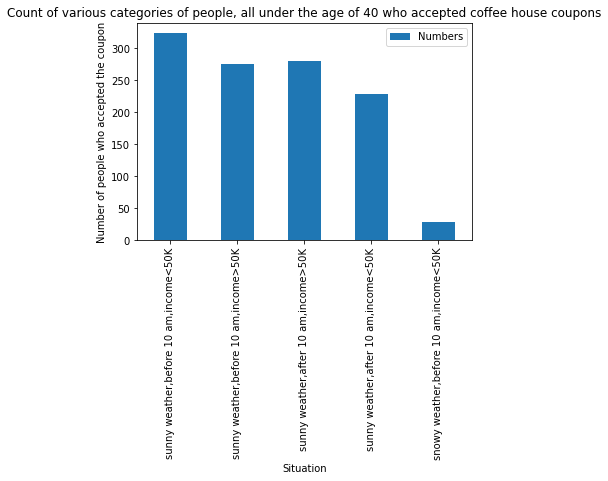

In [402]:
chart.plot(kind='bar', x='Situation')
plt.ylabel("Number of people who accepted the coupon")
plt.title("Count of various categories of people, all under the age of 40 who accepted coffee house coupons")

In [ ]:
# Based on the above analysis we can clearly see that the best target group for accepting coupons is people under the age of 40 who make less than 50k coming to a coffee shop before 10 am in sunny weather.